### We use RAWG.io to get information on specific games (e.x., genres, types, platforms and developers)

In [1]:
#set up the api to get gamedatabase from RAWG.com
#For more details of api, please check out laundmo's website https://pypi.org/project/rawgpy
import rawgpy as ry

In [2]:
import numpy as np
import pandas as pd
import math
from datetime import datetime

In [3]:
rawg = ry.RAWG("")
results = rawg.search("-30-great-games--family-party")  # defaults to returning the top 5 results
game = results[0]
game.populate()

True

In [4]:
for item in results:
    item.populate()
    print(item.slug)

family-party-30-great-games
family-party-30-great-games-obstacle-arcade
red-game-without-a-great-name
family-guy-bttm
dungeon-party


In [5]:
results_2 = rawg.search("Dragon's Lair")  # defaults to returning the top 5 results
for item in results_2:
    item.populate()
    print(item.slug)
    print([plat_g.released_at for plat_g in item.platforms])

dragons-lair-hd
['2010-11-02', '2009-12-21', '2013-05-17', '2013-05-17', '2013-05-17', '2012-05-18', '', '2009-12-21']
dragons-lair
['1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20', '1991-09-20']
dragons-lair-the-legend
['']
dragons-lair-trilogy
['1983-06-18', '2019-05-17', '2019-01-17', '']
dragons-lair-psp
['', '']


In [6]:
#try getting a precise game
result_precise = rawg.get_game("007-from-russia-with-love")
game_1 = result_precise
game_1.populate()

KeyError: 'slug'

In [7]:
game_1.name

NameError: name 'game_1' is not defined

In [8]:
#get the most recent games in 5 years - comment on 10/9/2019
results_all = rawg.search("\*")
len(results_all)

0

In [9]:
print(game_1.name)
print(game_1.slug)

NameError: name 'game_1' is not defined

In [10]:
print(game.name)

Family Party: 30 Great Games


In [11]:
print(game.slug)

family-party-30-great-games


In [12]:
print(game.description)

<p style="margin-top: 0">
      Optimized for the Wii Remote, Family Party: 30 Great Games has more than 
      30 fun games to play as players tackle obstacle courses, plate spin, 
      fire laser guns, test their wit at memory games and more. The game 
      offers a wide variety of fun and addictive party games for up to 4 
      players featuring everything from track n' field, to playground games, 
      to brain games and more.
    </p>


In [13]:
for store in game.stores:
    print(store.url)

https://www.nintendo.com/games/detail/kvg11nleein10hwzuqs96segtre3abu9


In [14]:
print(game.percent)

AttributeError: 'Game' object has no attribute 'percent'

In [15]:
print([g.name for g in game.collections])

[]


In [16]:
print(game.developers)

[]


In [17]:
print(game.categories)

None


In [18]:
print(game.genres)

[]


In [19]:
print(game.rating)

0.0


In [20]:
print(game.esrb)

AttributeError: module 'rawgpy.data_classes.rating' has no attribute 'ESRB'

In [21]:
print([p.name for p in game.platforms])

['Wii']


In [22]:
print([plat_g.released_at for plat_g in game.platforms])

['2008-12-02']


In [23]:
print(game.reactions)

[]


In [24]:
print(game.tags)

[party]


In [25]:
print(game.suggestions)

<generator object suggestions at 0x000002918761CE60>


### Then we import price data from an customized csv from pricecharts.com 

In [26]:
filename = "price-guide.csv"

In [27]:
price_data = pd.read_csv(filename,encoding = "mac_roman")

In [28]:
price_data.head(10)

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date
0,16491,3DO,20th Century Video Almanac,$6.40,$29.99,$49.00,NaN,NaN,$1.34,$6.69,$9.30,$30.99,$20.40,$50.99,4,Action & Adventure,1/1/1993
1,16492,3DO,3D Atlas,$11.50,$22.32,$36.94,NaN,NaN,$2.40,$11.99,$6.90,$22.99,$15.60,$38.99,5,Action & Adventure,1/1/1994
2,16493,3DO,3DO Buffet,$5.56,$9.00,$17.00,NaN,NaN,$1.16,$5.79,$1.90,$9.49,$3.60,$17.99,6,Action & Adventure,4/27/1995
3,16662,3DO,3DO Console,$110.89,$210.31,$349.50,NaN,NaN,$46.40,$115.99,$88.40,$220.99,$146.80,$366.99,67,Systems,NaN
4,40421,3DO,3DO Console FZ-10,$66.03,$145.27,$296.85,NaN,NaN,$27.60,$68.99,$61.20,$152.99,$124.80,$311.99,3,Systems,1/1/1995
5,40422,3DO,3DO Console Goldstar,$119.54,$223.13,$446.26,NaN,NaN,$50.40,$125.99,$93.60,$233.99,$187.60,$468.99,29,Systems,1/1/1995
6,40424,3DO,3DO Console Robo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995
7,40423,3DO,3DO Console Sanyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995
8,40414,3DO,3DO Controller,$19.48,$44.01,$87.84,NaN,NaN,$4.00,$19.99,$18.40,$45.99,$36.80,$91.99,4,Controllers,1/1/1995
9,59649,3DO,3DO Gamegun,$110.00,$242.00,$495.00,NaN,NaN,$46.40,$115.99,$101.60,$253.99,$208.00,$519.99,3,Controllers,1/1/1993


In [29]:
len(price_data)

49638

In [30]:
sample_date = price_data.loc[2,"release-date"]

In [31]:
sample_date 

'4/27/1995'

In [32]:
datetime_object = datetime.strptime(sample_date , '%m/%d/%Y')

In [33]:
datetime_object.year

1995

In [34]:
#add a new column with new format of the dates
price_data["release-date-dt"] = pd.to_datetime(price_data["release-date"], errors="coerce")

In [35]:
price_data

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt
0,16491,3DO,20th Century Video Almanac,$6.40,$29.99,$49.00,NaN,NaN,$1.34,$6.69,$9.30,$30.99,$20.40,$50.99,4,Action & Adventure,1/1/1993,1993-01-01
1,16492,3DO,3D Atlas,$11.50,$22.32,$36.94,NaN,NaN,$2.40,$11.99,$6.90,$22.99,$15.60,$38.99,5,Action & Adventure,1/1/1994,1994-01-01
2,16493,3DO,3DO Buffet,$5.56,$9.00,$17.00,NaN,NaN,$1.16,$5.79,$1.90,$9.49,$3.60,$17.99,6,Action & Adventure,4/27/1995,1995-04-27
3,16662,3DO,3DO Console,$110.89,$210.31,$349.50,NaN,NaN,$46.40,$115.99,$88.40,$220.99,$146.80,$366.99,67,Systems,NaN,NaT
4,40421,3DO,3DO Console FZ-10,$66.03,$145.27,$296.85,NaN,NaN,$27.60,$68.99,$61.20,$152.99,$124.80,$311.99,3,Systems,1/1/1995,1995-01-01
5,40422,3DO,3DO Console Goldstar,$119.54,$223.13,$446.26,NaN,NaN,$50.40,$125.99,$93.60,$233.99,$187.60,$468.99,29,Systems,1/1/1995,1995-01-01
6,40424,3DO,3DO Console Robo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995,1995-01-01
7,40423,3DO,3DO Console Sanyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995,1995-01-01
8,40414,3DO,3DO Controller,$19.48,$44.01,$87.84,NaN,NaN,$4.00,$19.99,$18.40,$45.99,$36.80,$91.99,4,Controllers,1/1/1995,1995-01-01
9,59649,3DO,3DO Gamegun,$110.00,$242.00,$495.00,NaN,NaN,$46.40,$115.99,$101.60,$253.99,$208.00,$519.99,3,Controllers,1/1/1993,1993-01-01


In [36]:
price_data[price_data["release-date-dt"].isnull()]

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt
3,16662,3DO,3DO Console,$110.89,$210.31,$349.50,NaN,NaN,$46.40,$115.99,$88.40,$220.99,$146.80,$366.99,67,Systems,NaN,NaT
23,16509,3DO,C.P.U. Bach,$9.99,$12.04,$23.54,NaN,NaN,$2.00,$9.99,$2.60,$12.99,$7.50,$24.99,15,Action & Adventure,NaN,NaT
28,16514,3DO,Club 3DO: Station Invasion,$8.98,$10.23,$40.37,NaN,NaN,$1.88,$9.39,$2.20,$10.99,$16.80,$41.99,5,Action & Adventure,NaN,NaT
47,16534,3DO,Dragon's Lair,$12.72,$30.99,$58.28,NaN,NaN,$2.60,$12.99,$9.90,$32.99,$24.40,$60.99,63,Action & Adventure,NaN,NaT
60,16542,3DO,Fatty Bear's Fun Pack,$12.59,$28.43,$56.65,NaN,NaN,$2.60,$12.99,$9.00,$29.99,$23.60,$58.99,3,Action & Adventure,NaN,NaT
78,16559,3DO,Iron Angel of the Apocalyspe: The Return,$17.31,$27.00,$31.68,NaN,NaN,$3.60,$17.99,$8.40,$27.99,$9.90,$32.99,10,Action & Adventure,NaN,NaT
79,31642,3DO,It's a Bird's Life,$16.79,$29.00,$36.00,NaN,NaN,$3.60,$17.99,$9.00,$29.99,$15.20,$37.99,5,Other,NaN,NaT
102,16583,3DO,NeuroDancer: Journey Into The Neuronet,$95.21,$123.61,$400.00,NaN,NaN,$40.00,$99.99,$52.00,$129.99,$168.00,$419.99,12,Action & Adventure,NaN,NaT
107,16588,3DO,Olympic Soccer,$8.72,$45.30,$71.25,NaN,NaN,$1.84,$9.19,$19.20,$47.99,$30.00,$74.99,5,Action & Adventure,NaN,NaT
108,16589,3DO,Olympic Summer Games,$18.94,$34.20,$35.15,NaN,NaN,$4.00,$19.99,$14.40,$35.99,$14.80,$36.99,8,Action & Adventure,NaN,NaT


In [37]:
price_data["release-date-dt"].isnull().value_counts()

False    46989
True      2649
Name: release-date-dt, dtype: int64

In [38]:
#keep the error data for deeper analysis in the future
price_data_date_error = price_data[price_data["release-date-dt"].isnull()]

##### All the data needs to be cleaned in the following way:
##### 1. All the dollar sign needs to be removed for computation purposes
##### 2. The release year should be singled out so that we can order titles by year and month to make sure of a succeful match
##### 3. Product names need to be changed to "slug" name format as we see in the rawg website
##### 4. Group games by systems (needs a new table)
##### 5. We only need games--so rows with a genres "Systems", "Accessories" and "Controllers" need to be filtered out
##### 6. Missing data needs to be handled

### 1. Removing the dollar signs

In [39]:
price_titles = ["loose-price","cib-price","new-price","gamestop-price","gamestop-trade-price","retail-loose-buy",
                "retail-loose-sell","retail-cib-buy","retail-cib-sell","retail-new-buy","retail-new-sell"]

In [40]:
#replacing the dollar signs
for title in price_titles:
    price_data[title] = price_data[title].str.replace('$','')

In [41]:
price_data

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt
0,16491,3DO,20th Century Video Almanac,6.40,29.99,49.00,NaN,NaN,1.34,6.69,9.30,30.99,20.40,50.99,4,Action & Adventure,1/1/1993,1993-01-01
1,16492,3DO,3D Atlas,11.50,22.32,36.94,NaN,NaN,2.40,11.99,6.90,22.99,15.60,38.99,5,Action & Adventure,1/1/1994,1994-01-01
2,16493,3DO,3DO Buffet,5.56,9.00,17.00,NaN,NaN,1.16,5.79,1.90,9.49,3.60,17.99,6,Action & Adventure,4/27/1995,1995-04-27
3,16662,3DO,3DO Console,110.89,210.31,349.50,NaN,NaN,46.40,115.99,88.40,220.99,146.80,366.99,67,Systems,NaN,NaT
4,40421,3DO,3DO Console FZ-10,66.03,145.27,296.85,NaN,NaN,27.60,68.99,61.20,152.99,124.80,311.99,3,Systems,1/1/1995,1995-01-01
5,40422,3DO,3DO Console Goldstar,119.54,223.13,446.26,NaN,NaN,50.40,125.99,93.60,233.99,187.60,468.99,29,Systems,1/1/1995,1995-01-01
6,40424,3DO,3DO Console Robo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995,1995-01-01
7,40423,3DO,3DO Console Sanyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995,1995-01-01
8,40414,3DO,3DO Controller,19.48,44.01,87.84,NaN,NaN,4.00,19.99,18.40,45.99,36.80,91.99,4,Controllers,1/1/1995,1995-01-01
9,59649,3DO,3DO Gamegun,110.00,242.00,495.00,NaN,NaN,46.40,115.99,101.60,253.99,208.00,519.99,3,Controllers,1/1/1993,1993-01-01


### 2. The release year should be singled out 

In [42]:
#add one more colume with only year
price_data["release-year"] =  price_data["release-date-dt"].apply(lambda x:x.year)

In [43]:
price_data

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year
0,16491,3DO,20th Century Video Almanac,6.40,29.99,49.00,NaN,NaN,1.34,6.69,9.30,30.99,20.40,50.99,4,Action & Adventure,1/1/1993,1993-01-01,1993.0
1,16492,3DO,3D Atlas,11.50,22.32,36.94,NaN,NaN,2.40,11.99,6.90,22.99,15.60,38.99,5,Action & Adventure,1/1/1994,1994-01-01,1994.0
2,16493,3DO,3DO Buffet,5.56,9.00,17.00,NaN,NaN,1.16,5.79,1.90,9.49,3.60,17.99,6,Action & Adventure,4/27/1995,1995-04-27,1995.0
3,16662,3DO,3DO Console,110.89,210.31,349.50,NaN,NaN,46.40,115.99,88.40,220.99,146.80,366.99,67,Systems,NaN,NaT,NaN
4,40421,3DO,3DO Console FZ-10,66.03,145.27,296.85,NaN,NaN,27.60,68.99,61.20,152.99,124.80,311.99,3,Systems,1/1/1995,1995-01-01,1995.0
5,40422,3DO,3DO Console Goldstar,119.54,223.13,446.26,NaN,NaN,50.40,125.99,93.60,233.99,187.60,468.99,29,Systems,1/1/1995,1995-01-01,1995.0
6,40424,3DO,3DO Console Robo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995,1995-01-01,1995.0
7,40423,3DO,3DO Console Sanyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995,1995-01-01,1995.0
8,40414,3DO,3DO Controller,19.48,44.01,87.84,NaN,NaN,4.00,19.99,18.40,45.99,36.80,91.99,4,Controllers,1/1/1995,1995-01-01,1995.0
9,59649,3DO,3DO Gamegun,110.00,242.00,495.00,NaN,NaN,46.40,115.99,101.60,253.99,208.00,519.99,3,Controllers,1/1/1993,1993-01-01,1993.0


In [44]:
#add months too


### 3. Change to Slug Name
##### After observing the slug names in RAWG, these are the obvious patterns:
##### 1. slugs are all lower cases
##### 2. all the columns (semicolumns)and spaces are replaces by "-"
##### 3. Apostrophies and dots are deleted
##### 4. One issue I see is that in some of the sequals, arab numbers are added at the end of the title (While some other sequals does not have that number).However, with good-enough slug name, the first hit from the search function of RAWG seems always comes up with the correct answer

In [45]:
#create a copy of the product names - keep the original in case we want to get back to the original name at the end
price_data["product-name-slug"] = price_data["product-name"]

In [46]:
#change all to lower cases
price_data["product-name-slug"]  =  price_data["product-name-slug"].str.lower()

In [47]:
#delete all the apostrophes and dots
price_data["product-name-slug"]  = price_data["product-name-slug"].str.replace("\'","")

In [48]:
price_data["product-name-slug"]  = price_data["product-name-slug"].str.replace(".","")

In [49]:
#all the columns (semicolumns)and spaces are replaces by "-"

price_data["product-name-slug"]  = price_data["product-name-slug"].str.replace(":","-")

In [50]:
price_data["product-name-slug"]  = price_data["product-name-slug"].str.replace(";","-")

In [51]:
price_data["product-name-slug"]  = price_data["product-name-slug"].str.replace(" ","-")

In [52]:
price_data

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
0,16491,3DO,20th Century Video Almanac,6.40,29.99,49.00,NaN,NaN,1.34,6.69,9.30,30.99,20.40,50.99,4,Action & Adventure,1/1/1993,1993-01-01,1993.0,20th-century-video-almanac
1,16492,3DO,3D Atlas,11.50,22.32,36.94,NaN,NaN,2.40,11.99,6.90,22.99,15.60,38.99,5,Action & Adventure,1/1/1994,1994-01-01,1994.0,3d-atlas
2,16493,3DO,3DO Buffet,5.56,9.00,17.00,NaN,NaN,1.16,5.79,1.90,9.49,3.60,17.99,6,Action & Adventure,4/27/1995,1995-04-27,1995.0,3do-buffet
3,16662,3DO,3DO Console,110.89,210.31,349.50,NaN,NaN,46.40,115.99,88.40,220.99,146.80,366.99,67,Systems,NaN,NaT,NaN,3do-console
4,40421,3DO,3DO Console FZ-10,66.03,145.27,296.85,NaN,NaN,27.60,68.99,61.20,152.99,124.80,311.99,3,Systems,1/1/1995,1995-01-01,1995.0,3do-console-fz-10
5,40422,3DO,3DO Console Goldstar,119.54,223.13,446.26,NaN,NaN,50.40,125.99,93.60,233.99,187.60,468.99,29,Systems,1/1/1995,1995-01-01,1995.0,3do-console-goldstar
6,40424,3DO,3DO Console Robo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995,1995-01-01,1995.0,3do-console-robo
7,40423,3DO,3DO Console Sanyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995,1995-01-01,1995.0,3do-console-sanyo
8,40414,3DO,3DO Controller,19.48,44.01,87.84,NaN,NaN,4.00,19.99,18.40,45.99,36.80,91.99,4,Controllers,1/1/1995,1995-01-01,1995.0,3do-controller
9,59649,3DO,3DO Gamegun,110.00,242.00,495.00,NaN,NaN,46.40,115.99,101.60,253.99,208.00,519.99,3,Controllers,1/1/1993,1993-01-01,1993.0,3do-gamegun


### Examine the data a little bit

In [53]:
price_data["genre"].unique()

array(['Action & Adventure', 'Systems', 'Controllers', 'Other', 'FPS',
       'Baseball', 'Sports', 'Soccer', 'Accessories', 'Puzzle', 'Racing',
       'Strategy', 'Visual Novel', 'Arcade', 'Fighting', "Shoot'em Up",
       'Platformer', 'Football', 'Educational', 'Basketball', 'RPG',
       'Wrestling', 'Extreme Sports', 'Sport', 'Music', 'Simulation',
       'Party', 'Extreme', 'Skateboarding', 'Dance', 'Fishing',
       'Magazine', 'Hockey', "Racing'", 'Racomg', 'Action', 'FIghting',
       'Golf', 'Space Combat Sim', 'RTT', 'Trivia', "Shoot 'em Up",
       'Game show', 'Stealth', 'Fitness', 'Controller'], dtype=object)

 it is clear that genres with "Systems", "Controllers", "Controller", "Magazine" and "Accessories" are not actually video games

In [54]:
#example
price_data[price_data["genre"]== 'Systems']


,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
3,16662,3DO,3DO Console,110.89,210.31,349.50,NaN,NaN,46.40,115.99,88.40,220.99,146.80,366.99,67,Systems,NaN,NaT,NaN,3do-console
4,40421,3DO,3DO Console FZ-10,66.03,145.27,296.85,NaN,NaN,27.60,68.99,61.20,152.99,124.80,311.99,3,Systems,1/1/1995,1995-01-01,1995.0,3do-console-fz-10
5,40422,3DO,3DO Console Goldstar,119.54,223.13,446.26,NaN,NaN,50.40,125.99,93.60,233.99,187.60,468.99,29,Systems,1/1/1995,1995-01-01,1995.0,3do-console-goldstar
6,40424,3DO,3DO Console Robo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995,1995-01-01,1995.0,3do-console-robo
7,40423,3DO,3DO Console Sanyo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,1/1/1995,1995-01-01,1995.0,3do-console-sanyo
183,58618,Amiga CD32,Amiga CD32 System,184.54,405.99,811.98,NaN,NaN,77.60,193.99,170.40,425.99,341.20,852.99,3,Systems,9/17/1993,1993-09-17,1993.0,amiga-cd32-system
373,62450,Arcadia 2001,Arcadia 2001 System,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Systems,5/1/1982,1982-05-01,1982.0,arcadia-2001-system
427,40411,Atari 2600,Atari 2600 Jr System,63.83,172.32,258.39,NaN,NaN,26.80,66.99,72.40,180.99,108.40,270.99,3,Systems,1/1/1980,1980-01-01,1980.0,atari-2600-jr-system
429,19987,Atari 2600,Atari 2600 System,29.33,70.80,129.65,NaN,NaN,9.30,30.99,29.60,73.99,54.40,135.99,60,Systems,NaN,NaT,NaN,atari-2600-system
430,58596,Atari 2600,Atari 2600 System [Vadar],56.49,152.52,225.96,NaN,NaN,23.60,58.99,64.00,159.99,94.80,236.99,349,Systems,NaN,NaT,NaN,atari-2600-system-[vadar]


In [55]:
price_data[price_data["genre"]== 'Controllers']

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
8,40414,3DO,3DO Controller,19.48,44.01,87.84,NaN,NaN,4.00,19.99,18.40,45.99,36.80,91.99,4,Controllers,1/1/1995,1995-01-01,1995.0,3do-controller
9,59649,3DO,3DO Gamegun,110.00,242.00,495.00,NaN,NaN,46.40,115.99,101.60,253.99,208.00,519.99,3,Controllers,1/1/1993,1993-01-01,1993.0,3do-gamegun
426,40412,Atari 2600,Atari 2600 Controller,9.96,26.89,40.33,NaN,NaN,2.00,9.99,8.40,27.99,16.80,41.99,4,Controllers,1/1/1980,1980-01-01,1980.0,atari-2600-controller
428,40413,Atari 2600,Atari 2600 Paddle Controller Set,16.98,52.29,78.44,NaN,NaN,3.60,17.99,22.00,54.99,32.80,81.99,425,Controllers,1/1/1980,1980-01-01,1980.0,atari-2600-paddle-controller-set
522,38583,Atari 2600,Comsmic Commander Control,49.89,133.00,199.50,NaN,NaN,20.80,51.99,56.00,139.99,83.60,208.99,3,Controllers,1/1/1985,1985-01-01,1985.0,comsmic-commander-control
577,50115,Atari 2600,Driving Controller,10.99,29.67,43.96,NaN,NaN,2.40,11.99,9.30,30.99,18.40,45.99,56,Controllers,1/1/1980,1980-01-01,1980.0,driving-controller
986,50150,Atari 2600,Track & Field Controller,44.99,133.31,199.96,NaN,NaN,18.80,46.99,56.00,139.99,84.00,209.99,10,Controllers,1/1/1985,1985-01-01,1985.0,track-&-field-controller
987,54059,Atari 2600,Trak Ball Controller,44.96,50.00,97.96,NaN,NaN,18.80,46.99,21.20,52.99,41.20,102.99,14,Controllers,1/1/1985,1985-01-01,1985.0,trak-ball-controller
1010,45080,Atari 2600,Video Touch Pad Controller,2.39,6.45,9.56,NaN,NaN,NaN,2.49,1.40,6.79,2.00,9.99,3,Controllers,1/1/1980,1980-01-01,1980.0,video-touch-pad-controller
1021,58063,Atari 2600,Wireless Controller,14.43,42.26,57.73,NaN,NaN,3.00,14.99,17.60,43.99,24.40,60.99,79,Controllers,NaN,NaT,NaN,wireless-controller


In [56]:
price_data[price_data["genre"]== 'Controller']

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
45481,38579,Wii,Tatsunoko vs. Capcom: Ultimate All Stars Contr...,34.17,51.26,102.51,NaN,NaN,14.40,35.99,21.60,53.99,43.20,107.99,4,Controller,1/26/2010,2010-01-26,2010.0,tatsunoko-vs-capcom--ultimate-all-stars-contro...


In [57]:
price_data[price_data["genre"]== 'Magazine']

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
13880,54135,Nintendo Power,[Volume 100] 100 Best Games Issue,16.88,NaN,NaN,NaN,NaN,3.60,17.99,6.60,21.99,NaN,NaN,49,Magazine,9/1/1997,1997-09-01,1997.0,[volume-100]-100-best-games-issue
13881,54327,Nintendo Power,[Volume 101] Extreme G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Magazine,1/1/1997,1997-01-01,1997.0,[volume-101]-extreme-g
13882,54133,Nintendo Power,[Volume 102] NFL Quarterback Club,7.14,NaN,NaN,NaN,NaN,1.50,7.49,2.00,9.99,NaN,NaN,18,Magazine,11/1/1997,1997-11-01,1997.0,[volume-102]-nfl-quarterback-club
13883,54138,Nintendo Power,[Volume 103] Diddy Kong's Racing,8.50,NaN,NaN,NaN,NaN,1.78,8.89,2.20,10.99,NaN,NaN,16,Magazine,12/1/1997,1997-12-01,1997.0,[volume-103]-diddy-kongs-racing
13884,54146,Nintendo Power,[Volume 104] Yoshi's Story,10.50,NaN,NaN,NaN,NaN,2.20,10.99,2.80,13.99,NaN,NaN,14,Magazine,1/1/1998,1998-01-01,1998.0,[volume-104]-yoshis-story
13885,54147,Nintendo Power,[Volume 105] WCW vs NWO,3.38,NaN,NaN,NaN,NaN,NaN,3.59,1.00,4.99,NaN,NaN,18,Magazine,2/1/1998,1998-02-01,1998.0,[volume-105]-wcw-vs-nwo
13886,54136,Nintendo Power,[Volume 106] 1080 Snowboarding,4.72,NaN,NaN,NaN,NaN,1.00,4.99,1.40,6.99,NaN,NaN,12,Magazine,3/1/1998,1998-03-01,1998.0,[volume-106]-1080-snowboarding
13887,54140,Nintendo Power,[Volume 107] NBA Courtside,2.99,NaN,NaN,NaN,NaN,NaN,3.09,1.00,4.99,NaN,NaN,10,Magazine,4/1/1998,1998-04-01,1998.0,[volume-107]-nba-courtside
13888,54328,Nintendo Power,[Volume 108] Ken Griffey Jr Baseball,7.00,NaN,NaN,NaN,NaN,1.48,7.39,2.00,9.99,NaN,NaN,39,Magazine,5/1/1998,1998-05-01,1998.0,[volume-108]-ken-griffey-jr-baseball
13889,54329,Nintendo Power,[Volume 109] Banjo Tooie,10.61,NaN,NaN,NaN,NaN,2.20,10.99,2.80,13.99,NaN,NaN,26,Magazine,6/1/1998,1998-06-01,1998.0,[volume-109]-banjo-tooie


In [59]:
price_data[price_data["genre"]== 'Accessories']

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
66,46398,3DO,GameGun,43.38,145.00,290.00,NaN,NaN,18.40,45.99,60.80,151.99,122.00,304.99,6,Accessories,1/1/1995,1995-01-01,1995.0,gamegun
214,58194,Amiibo,Daisy [Super Smash Bros],18.50,NaN,20.20,NaN,NaN,3.80,18.99,6.90,22.99,6.30,20.99,121,Accessories,4/12/2019,2019-04-12,2019.0,daisy-[super-smash-bros]
234,55698,Amiibo,Ice Climbers,14.00,NaN,16.66,NaN,NaN,3.00,14.99,3.60,17.99,3.40,16.99,248,Accessories,2/15/2019,2019-02-15,2019.0,ice-climbers
246,62454,Amiibo,Isabelle,6.99,NaN,25.03,NaN,NaN,1.46,7.29,1.80,8.99,7.80,25.99,473,Accessories,7/26/2019,2019-07-26,2019.0,isabelle
249,63780,Amiibo,Ivysaur,14.04,NaN,14.99,NaN,NaN,3.00,14.99,3.60,17.99,3.20,15.99,3,Accessories,9/20/2019,2019-09-20,2019.0,ivysaur
264,63731,Amiibo,Link - Link's Awakening,20.99,NaN,21.26,NaN,NaN,6.60,21.99,7.80,25.99,6.60,21.99,1866,Accessories,9/16/2019,2019-09-16,2019.0,link---links-awakening
300,59647,Amiibo,Mii Brawler,13.50,NaN,54.99,NaN,NaN,2.80,13.99,3.40,16.99,23.20,57.99,83,Accessories,NaN,NaT,NaN,mii-brawler
301,59646,Amiibo,Mii Gunner,16.50,NaN,23.75,NaN,NaN,3.40,16.99,6.30,20.99,7.50,24.99,225,Accessories,NaN,NaT,NaN,mii-gunner
313,62453,Amiibo,Pichu,12.00,NaN,15.92,NaN,NaN,2.60,12.99,3.20,15.99,3.40,16.99,159,Accessories,7/26/2019,2019-07-26,2019.0,pichu
316,55848,Amiibo,Piranha Plant,23.00,NaN,27.55,NaN,NaN,7.20,23.99,8.70,28.99,8.70,28.99,260,Accessories,2/15/2019,2019-02-15,2019.0,piranha-plant


These rows need to be removed to have a cleaner view on "games" only

In [60]:
genre_to_delete = ['Systems','Magazine','Controllers','Controller','Accessories']

In [61]:
#before modification
len(price_data)

49638

In [62]:
for g_ko in genre_to_delete:
    price_data = price_data.drop(price_data[price_data['genre'] == g_ko].index)

In [63]:
#after deletion
len(price_data)

48105

At the same time we can also explore a little about the rows with errors on release date as seen earlier

In [64]:
price_data_date_error

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt
3,16662,3DO,3DO Console,$110.89,$210.31,$349.50,NaN,NaN,$46.40,$115.99,$88.40,$220.99,$146.80,$366.99,67,Systems,NaN,NaT
23,16509,3DO,C.P.U. Bach,$9.99,$12.04,$23.54,NaN,NaN,$2.00,$9.99,$2.60,$12.99,$7.50,$24.99,15,Action & Adventure,NaN,NaT
28,16514,3DO,Club 3DO: Station Invasion,$8.98,$10.23,$40.37,NaN,NaN,$1.88,$9.39,$2.20,$10.99,$16.80,$41.99,5,Action & Adventure,NaN,NaT
47,16534,3DO,Dragon's Lair,$12.72,$30.99,$58.28,NaN,NaN,$2.60,$12.99,$9.90,$32.99,$24.40,$60.99,63,Action & Adventure,NaN,NaT
60,16542,3DO,Fatty Bear's Fun Pack,$12.59,$28.43,$56.65,NaN,NaN,$2.60,$12.99,$9.00,$29.99,$23.60,$58.99,3,Action & Adventure,NaN,NaT
78,16559,3DO,Iron Angel of the Apocalyspe: The Return,$17.31,$27.00,$31.68,NaN,NaN,$3.60,$17.99,$8.40,$27.99,$9.90,$32.99,10,Action & Adventure,NaN,NaT
79,31642,3DO,It's a Bird's Life,$16.79,$29.00,$36.00,NaN,NaN,$3.60,$17.99,$9.00,$29.99,$15.20,$37.99,5,Other,NaN,NaT
102,16583,3DO,NeuroDancer: Journey Into The Neuronet,$95.21,$123.61,$400.00,NaN,NaN,$40.00,$99.99,$52.00,$129.99,$168.00,$419.99,12,Action & Adventure,NaN,NaT
107,16588,3DO,Olympic Soccer,$8.72,$45.30,$71.25,NaN,NaN,$1.84,$9.19,$19.20,$47.99,$30.00,$74.99,5,Action & Adventure,NaN,NaT
108,16589,3DO,Olympic Summer Games,$18.94,$34.20,$35.15,NaN,NaN,$4.00,$19.99,$14.40,$35.99,$14.80,$36.99,8,Action & Adventure,NaN,NaT


In [65]:
price_data_date_error["genre"].value_counts()

Action & Adventure    1663
Accessories            155
Other                  154
Systems                 93
Sports                  75
Racing                  68
Arcade                  56
Controllers             52
Puzzle                  47
Shoot'em Up             39
Fighting                34
RPG                     32
Simulation              30
Platformer              30
FPS                     20
Strategy                17
Party                   16
Football                11
Basketball              11
Baseball                10
Soccer                   9
Music                    8
Wrestling                6
Extreme Sports           5
Dance                    4
Educational              2
Visual Novel             2
Name: genre, dtype: int64

 It is worth pointing out that many titles with such error are actual games 
 
 
 let's look at them in detail

In [66]:
#example: Assassin\'s Creed IV: Black Flag
price_data[price_data['product-name'].str.match('Assassin\'s Creed IV: Black Flag')]

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
23169,47163,PAL Playstation 3,Assassin's Creed IV: Black Flag,3.14,5.80,8.78,NaN,NaN,NaN,3.29,1.20,6.09,1.80,9.19,527,Action & Adventure,11/1/2013,2013-11-01,2013.0,assassins-creed-iv--black-flag
24327,57287,PAL Playstation 4,Assassin's Creed IV: Black Flag,6.98,11.52,17.35,NaN,NaN,1.46,7.29,2.40,11.99,3.60,17.99,1692,Action & Adventure,11/22/2013,2013-11-22,2013.0,assassins-creed-iv--black-flag
27952,63293,PAL Wii U,Assassin's Creed IV: Black Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Action & Adventure,10/29/2013,2013-10-29,2013.0,assassins-creed-iv--black-flag
28995,59797,PAL Xbox 360,Assassin's Creed IV: Black Flag,2.15,3.67,6.84,NaN,NaN,NaN,2.29,1.00,4.99,1.40,7.19,546,Action & Adventure,10/29/2013,2013-10-29,2013.0,assassins-creed-iv--black-flag
30215,64063,PAL Xbox One,Assassin's Creed IV: Black Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Action & Adventure,11/19/2013,2013-11-19,2013.0,assassins-creed-iv--black-flag
35446,34472,Playstation 3,Assassin's Creed IV: Black Flag,5.07,5.11,8.83,2.99,0.16,1.06,5.29,1.10,5.39,1.90,9.29,302,Action & Adventure,10/29/2013,2013-10-29,2013.0,assassins-creed-iv--black-flag
35447,34478,Playstation 3,Assassin's Creed IV: Black Flag [Limited Edition],19.56,34.88,67.47,NaN,NaN,6.30,20.99,14.80,36.99,28.40,70.99,28,Action & Adventure,10/29/2013,2013-10-29,2013.0,assassins-creed-iv--black-flag-[limited-edition]
37086,34523,Playstation 4,Assassin's Creed IV: Black Flag,9.00,10.18,12.24,19.99,4.00,1.90,9.49,2.20,10.99,2.60,12.99,944,Action & Adventure,11/12/2013,2013-11-12,2013.0,assassins-creed-iv--black-flag
37087,45181,Playstation 4,Assassin's Creed IV: Black Flag [Limited Edition],49.00,49.47,90.00,NaN,NaN,20.40,50.99,20.80,51.99,38.00,94.99,8,Action & Adventure,11/12/2013,2013-11-12,2013.0,assassins-creed-iv--black-flag-[limited-edition]
45731,34473,Wii U,Assassin's Creed IV: Black Flag,9.35,9.37,16.67,9.99,1.60,1.96,9.79,2.00,9.79,3.60,17.99,181,Action & Adventure,10/29/2013,2013-10-29,2013.0,assassins-creed-iv--black-flag


In [67]:
#another example: BioShock
price_data[price_data['product-name'].str.match('BioShock ')]

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
23220,47209,PAL Playstation 3,BioShock 2,3.60,4.06,11.97,NaN,NaN,0.76,3.79,1.00,4.99,2.60,12.99,430,Action & Adventure,2/9/2010,2010-02-09,2010.0,bioshock-2
23221,63208,PAL Playstation 3,BioShock 2 [Rapture Edition],14.20,17.04,25.56,NaN,NaN,3.00,14.99,3.60,17.99,8.10,26.99,3,Action & Adventure,2/9/2010,2010-02-09,2010.0,bioshock-2-[rapture-edition]
23222,63702,PAL Playstation 3,BioShock 2 [Special Edition],78.47,109.86,164.79,NaN,NaN,32.80,81.99,46.00,114.99,69.20,172.99,3,FPS,2/9/2010,2010-02-09,2010.0,bioshock-2-[special-edition]
23223,47210,PAL Playstation 3,BioShock Infinite,3.84,4.06,7.80,NaN,NaN,0.80,3.99,1.00,4.99,1.60,8.19,428,Action & Adventure,3/26/2013,2013-03-26,2013.0,bioshock-infinite
23224,62461,PAL Playstation 3,BioShock Ultimate Rapture Edition,4.94,8.46,10.37,NaN,NaN,1.04,5.19,1.80,8.89,2.20,10.99,109,Action & Adventure,1/15/2013,2013-01-15,2013.0,bioshock-ultimate-rapture-edition
29043,59828,PAL Xbox 360,BioShock 2,3.01,3.93,5.85,NaN,NaN,NaN,3.19,1.00,4.99,1.20,6.09,374,FPS,2/9/2010,2010-02-09,2010.0,bioshock-2
29044,63703,PAL Xbox 360,BioShock 2 [Special Edition],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,FPS,2/9/2010,2010-02-09,2010.0,bioshock-2-[special-edition]
29045,59830,PAL Xbox 360,BioShock Infinite,2.72,3.51,16.50,NaN,NaN,NaN,2.89,1.00,4.99,3.40,16.99,1010,FPS,3/26/2013,2013-03-26,2013.0,bioshock-infinite
30247,64091,PAL Xbox One,BioShock The Collection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Action & Adventure,9/13/2016,2016-09-13,2016.0,bioshock-the-collection
35522,20402,Playstation 3,BioShock 2,3.69,4.44,7.99,4.99,0.40,0.78,3.89,1.00,4.99,1.70,8.39,176,FPS,2/9/2010,2010-02-09,2010.0,bioshock-2


In [68]:
# third example Yoku's Island Express
price_data[price_data['product-name'].str.match('Yoku\'s Island')]

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
14698,47001,Nintendo Switch,Yoku's Island Express,18.18,18.99,24.31,19.99,4.00,3.80,18.99,4.00,19.99,7.80,25.99,206,Arcade,6/19/2018,2018-06-19,2018.0,yokus-island-express
19182,63788,PAL Nintendo Switch,Yoku's Island Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Platformer,6/13/2018,2018-06-13,2018.0,yokus-island-express
30820,65062,PAL Xbox One,Yoku's Island Express,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Arcade,1/1/2018,2018-01-01,2018.0,yokus-island-express
38763,47000,Playstation 4,Yoku's Island Express,9.41,9.99,13.17,9.99,1.60,1.98,9.89,2.00,9.99,2.80,13.99,62,Arcade,6/19/2018,2018-06-19,2018.0,yokus-island-express
49632,46999,Xbox One,Yoku's Island Express,5.00,6.32,14.10,9.99,1.40,1.06,5.29,1.30,6.59,3.00,14.99,24,Arcade,NaN,NaT,NaN,yokus-island-express


In [69]:
#example:Dragon's Lair
price_data[price_data['product-name'].str.match('Dragon\'s Lair')]

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
47,16534,3DO,Dragon's Lair,12.72,30.99,58.28,NaN,NaN,2.60,12.99,9.90,32.99,24.40,60.99,63,Action & Adventure,NaN,NaT,NaN,dragons-lair
1595,21398,CD-i,Dragon's Lair,18.38,24.99,34.95,NaN,NaN,3.80,18.99,7.80,25.99,14.80,36.99,10,Action & Adventure,NaN,NaT,NaN,dragons-lair
2012,17048,Commodore 64,Dragon's Lair,18.50,25.53,53.69,NaN,NaN,3.80,18.99,8.10,26.99,22.40,55.99,9,Action & Adventure,NaN,NaT,NaN,dragons-lair
2013,17049,Commodore 64,Dragon's Lair Part II Escape from Singe's Castle,14.99,33.05,67.32,NaN,NaN,3.20,15.99,10.50,34.99,28.40,70.99,3,Action & Adventure,NaN,NaT,NaN,dragons-lair-part-ii-escape-from-singes-castle
2842,42648,Famicom,Dragon's Lair,54.99,163.99,524.77,NaN,NaN,23.20,57.99,68.80,171.99,220.40,550.99,3,Action & Adventure,9/20/1991,1991-09-20,1991.0,dragons-lair
3903,34012,GameBoy,Dragon's Lair: The Legend,7.27,25.05,78.49,NaN,NaN,1.52,7.59,7.80,25.99,32.80,81.99,21,Action & Adventure,1/1/1991,1991-01-01,1991.0,dragons-lair--the-legend
5548,2833,GameBoy Color,Dragon's Lair,17.06,29.99,48.04,NaN,NaN,3.60,17.99,9.30,30.99,20.00,49.99,51,Action & Adventure,1/15/2001,2001-01-15,2001.0,dragons-lair
6036,3263,Gamecube,Dragon's Lair 3D,11.68,17.53,71.84,NaN,NaN,2.40,11.99,3.60,17.99,30.00,74.99,114,Action & Adventure,12/22/2002,2002-12-22,2002.0,dragons-lair-3d
9620,17556,Jaguar,Dragon's Lair (CD),29.24,44.83,54.99,NaN,NaN,9.30,30.99,18.80,46.99,23.20,57.99,12,Action & Adventure,11/1/1995,1995-11-01,1995.0,dragons-lair-(cd)
9972,12217,NES,Dragon's Lair the Legend,14.95,33.49,109.00,NaN,NaN,3.20,15.99,10.50,34.99,45.60,113.99,70,Action & Adventure,12/1/1990,1990-12-01,1990.0,dragons-lair-the-legend


It seems that the main reason that certain dates are missing is because the game is usually available on other platforms and maybe due to user input errors, the dates are missing. I have also noticed that release dates are not exact, although the release year is fairly accurate. Therefore, it should be fixable by filling in the dates of the release date on other platformas for the same title.      

However, some data is missing on one of the "bundles" (with complete add-ons, or 3 sequals in one collection), "reissues" and "remastered" (e.x.,reissued for a new console) versions but the name is in discrepancy with titles in other platforms. for example, BioShock [Collector's Edition] on Xbox 360 is probably the same game called BioShock The Collection on PS4 and the error might have been caused by mistakes of user entry. Buy it's hard to confirm. One thing to notice is that the number of copies sold in xbox 360 for this game is very low which might be contributed by the fact that Microsoft stopped producing this console in 2016 when BioShock The Collection started to launch in stores. The low sales volume is very likely a result of factors other than the game itself. In any case, let's assume that such titles represent a very small fraction of the sales and can be deleted without much impact.

for games that we can find the exact match with other game titles, we decided to use the date of the highest sale-volume game version. For games without any match, we need to delete these titles if there's no match when comparing to RAWG

In [70]:
#need to check if the missing data are random with respect to the observed data

#good news is that sales volume is complete
price_data_date_error[price_data_date_error["sales-volume"].isnull()]


,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt


In [71]:
#number of mising prices in the data set

len(price_data_date_error[price_data_date_error["new-price"].isnull()])

531

In [72]:

import matplotlib.pyplot as plt

In [73]:
#filter out the unwanred genres (No concoles, accessories, etc)

for g_ko in genre_to_delete:
    price_data_date_error= price_data_date_error.drop(price_data_date_error[price_data_date_error['genre'] == g_ko].index)
    

In [74]:
#let's check the distribution of sales-volume and new price
sales_v_error = price_data_date_error["sales-volume"]


#normalize the data

#sales_v_error = (sales_v_error - np.min(sales_v_error ))/(np.max(sales_v_error ) - np.min(sales_v_error))


In [75]:
np.max(sales_v_error ) 

15831

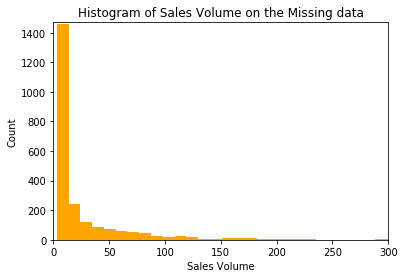

In [76]:
#draw histogram
%matplotlib inline
# matplotlib histogram
n, bins, patches = plt.hist(sales_v_error, color = 'orange',
         bins = 1500)

# Add labels
plt.title('Histogram of Sales Volume on the Missing data')
plt.xlabel('Sales Volume')
plt.ylabel('Count')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(0,300)
plt.show()

In [77]:
rows_prices_v_error = price_data_date_error[price_data_date_error["new-price"].notnull()]
prices_v_error = rows_prices_v_error["new-price"].str.replace("$","")
prices_v_error = prices_v_error.str.replace(",","")

In [78]:
prices_v_error = prices_v_error.astype(float)

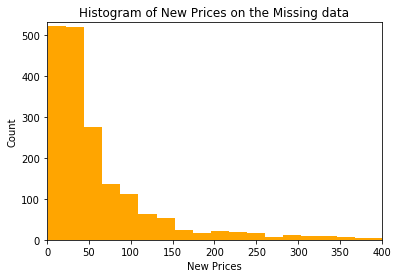

In [79]:
#draw histogram of the prices on the missing data
%matplotlib inline
# matplotlib histogram
n, bins, patches = plt.hist(prices_v_error, color = 'orange',
         bins = 1500)

# Add labels
plt.title('Histogram of New Prices on the Missing data')
plt.xlabel('New Prices')
plt.ylabel('Count')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(0,400)
plt.show()

By first look, it seems that the missing data is concentrated on the low-priced games, which might not random. However, the number of games in a certain price range itself in the market is inversly related to the price: the lower the price range, the more the games in this range. To see if this is the case, let's take a look at the data without missing dates.

In [80]:
#sales volume & sales price for new titles
sales_v = price_data["sales-volume"]
rows_prices_v= price_data[price_data["new-price"].notnull()]
prices_v = rows_prices_v["new-price"].str.replace("$","")
prices_v= prices_v.str.replace(",","")
prices_v = prices_v.astype(float)

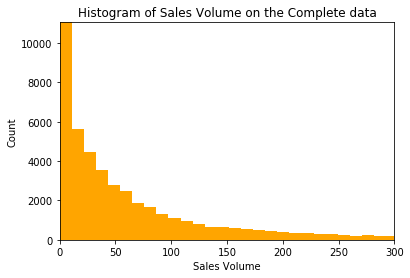

In [81]:
#draw sales volume
%matplotlib inline
# matplotlib histogram
n, bins, patches = plt.hist(sales_v, color = 'orange',
         bins = 1500)

# Add labels
plt.title('Histogram of Sales Volume on the Complete data')
plt.xlabel('Sales Volume')
plt.ylabel('Count')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(0,300)
plt.show()

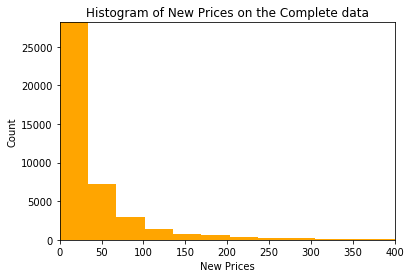

In [82]:
#draw histogram of the prices on the complete data
%matplotlib inline
# matplotlib histogram
n, bins, patches = plt.hist(prices_v, color = 'orange',
         bins = 1500)

# Add labels
plt.title('Histogram of New Prices on the Complete data')
plt.xlabel('New Prices')
plt.ylabel('Count')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(0,400)
plt.show()

As one can see, the prices and sale data exibit the same trend between the set with missing date and the set without missing date,signaling that the missing data is very likely random. We will delete these rows as a result. We will work with price_data moving forward.

In [83]:
#we need to also check missing prices

#check length of missing data

price_data_price_error = price_data[price_data["new-price"].isnull()]
len(price_data_price_error)/len(price_data)

0.10553996466063818

In [84]:
#check if the missing prices are random in terms of sals volume (so that the missing data has the same pattern as the non-missing data ones)

sales_data_price_nok = price_data.loc[price_data["new-price"].isnull(),"sales-volume"]
sales_data_price_ok = price_data.loc[price_data["new-price"].notnull(),"sales-volume"]

In [85]:
len(sales_data_price_ok)

43028

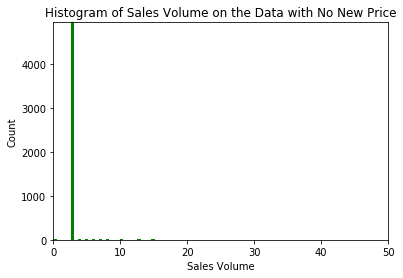

In [86]:
#plot to see

#draw sales volume
%matplotlib inline
# matplotlib histogram
n, bins, patches = plt.hist(sales_data_price_nok, color = 'green',
         bins = 800)

# Add labels
plt.title('Histogram of Sales Volume on the Data with No New Price')
plt.xlabel('Sales Volume')
plt.ylabel('Count')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(0,50)
plt.show()

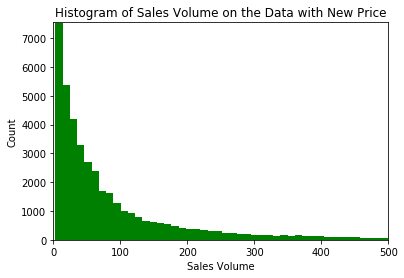

In [87]:
%matplotlib inline
# matplotlib histogram
n, bins, patches = plt.hist(sales_data_price_ok, color = 'green',
         bins = 1500)

# Add labels
plt.title('Histogram of Sales Volume on the Data with New Price')
plt.xlabel('Sales Volume')
plt.ylabel('Count')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(0,500)
plt.show()

In general, the pattern of sales volume of the ones with missing data follow the same trend as ones of the non-missing data. However, the case is much more extreme than what we saw with the data on the rows with missing dates. It seems that "penny" games are especially effected. For now, we proceed with filtering out these gamesm but it might be worthwhile to come back for this later.

In [93]:
label_lst = ["id","console-name","product-name","new-price","loose-price","sales-volume", "genre","release-date","release-date-dt","release-year","product-name-slug"]

In [94]:
price_data

,id,console-name,product-name,loose-price,cib-price,new-price,gamestop-price,gamestop-trade-price,retail-loose-buy,retail-loose-sell,retail-cib-buy,retail-cib-sell,retail-new-buy,retail-new-sell,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
0,16491,3DO,20th Century Video Almanac,6.40,29.99,49.00,NaN,NaN,1.34,6.69,9.30,30.99,20.40,50.99,4,Action & Adventure,1/1/1993,1993-01-01,1993.0,20th-century-video-almanac
1,16492,3DO,3D Atlas,11.50,22.32,36.94,NaN,NaN,2.40,11.99,6.90,22.99,15.60,38.99,5,Action & Adventure,1/1/1994,1994-01-01,1994.0,3d-atlas
2,16493,3DO,3DO Buffet,5.56,9.00,17.00,NaN,NaN,1.16,5.79,1.90,9.49,3.60,17.99,6,Action & Adventure,4/27/1995,1995-04-27,1995.0,3do-buffet
10,35962,3DO,3DO Maniac Pack,41.58,53.00,269.99,NaN,NaN,17.60,43.99,22.40,55.99,113.20,282.99,7,Other,1/1/1995,1995-01-01,1995.0,3do-maniac-pack
11,16496,3DO,Alone in the Dark,12.44,29.03,50.00,NaN,NaN,2.60,12.99,9.00,29.99,21.20,52.99,52,Action & Adventure,1/1/1993,1993-01-01,1993.0,alone-in-the-dark
12,16497,3DO,Alone in the Dark 2,17.05,35.00,82.92,NaN,NaN,3.60,17.99,14.80,36.99,34.80,86.99,25,Action & Adventure,1/1/1994,1994-01-01,1994.0,alone-in-the-dark-2
13,16498,3DO,Animals!,12.05,17.88,35.75,NaN,NaN,2.60,12.99,3.80,18.99,15.20,37.99,5,Action & Adventure,1/1/1993,1993-01-01,1993.0,animals!
14,16502,3DO,BC Racers,33.84,38.95,89.00,NaN,NaN,14.40,35.99,16.40,40.99,37.20,92.99,9,Action & Adventure,1/1/1995,1995-01-01,1995.0,bc-racers
15,16499,3DO,Ballz: The Directors Cut,12.96,19.99,19.99,NaN,NaN,2.80,13.99,6.30,20.99,6.30,20.99,15,Action & Adventure,1/1/1995,1995-01-01,1995.0,ballz--the-directors-cut
16,16500,3DO,Battle Chess,8.17,17.98,24.42,NaN,NaN,1.72,8.59,3.80,18.99,7.80,25.99,16,Action & Adventure,1/1/1993,1993-01-01,1993.0,battle-chess


In [95]:
#delete the rows with missing prices and missing release dates
price_data_to_use = price_data.loc[price_data["new-price"].notnull(),label_lst]
price_data_to_use = price_data_to_use.loc[price_data["release-year"].notnull(),label_lst]

In [96]:
price_data_to_use

,id,console-name,product-name,new-price,loose-price,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
0,16491,3DO,20th Century Video Almanac,49.00,6.40,4,Action & Adventure,1/1/1993,1993-01-01,1993.0,20th-century-video-almanac
1,16492,3DO,3D Atlas,36.94,11.50,5,Action & Adventure,1/1/1994,1994-01-01,1994.0,3d-atlas
2,16493,3DO,3DO Buffet,17.00,5.56,6,Action & Adventure,4/27/1995,1995-04-27,1995.0,3do-buffet
10,35962,3DO,3DO Maniac Pack,269.99,41.58,7,Other,1/1/1995,1995-01-01,1995.0,3do-maniac-pack
11,16496,3DO,Alone in the Dark,50.00,12.44,52,Action & Adventure,1/1/1993,1993-01-01,1993.0,alone-in-the-dark
12,16497,3DO,Alone in the Dark 2,82.92,17.05,25,Action & Adventure,1/1/1994,1994-01-01,1994.0,alone-in-the-dark-2
13,16498,3DO,Animals!,35.75,12.05,5,Action & Adventure,1/1/1993,1993-01-01,1993.0,animals!
14,16502,3DO,BC Racers,89.00,33.84,9,Action & Adventure,1/1/1995,1995-01-01,1995.0,bc-racers
15,16499,3DO,Ballz: The Directors Cut,19.99,12.96,15,Action & Adventure,1/1/1995,1995-01-01,1995.0,ballz--the-directors-cut
16,16500,3DO,Battle Chess,24.42,8.17,16,Action & Adventure,1/1/1993,1993-01-01,1993.0,battle-chess


##### Next step is to:
##### 1. Combine rows with the same title and release year in price_data by taking the weighted average of the new prices. Note that versions with additional features (games with additional features such as DLC and add-ons that were released the same year) will be considered a seperated game with a feature "additional add-on" = True
##### 2. All the available platforms and genre will be put into one cell separated by "-" (hold)
##### 3. Sales Volume will be summed up during merge.

In [97]:
#change new-price to float
price_data_to_use["new-price"] = price_data_to_use["new-price"].str.replace(",","")
price_data_to_use["new-price"] = price_data_to_use["new-price"].astype(float)

In [98]:
#modification 10/28 same applies to loose price
price_data_to_use["loose-price"] = price_data_to_use["loose-price"].str.replace(",","")
price_data_to_use["loose-price"] = price_data_to_use["loose-price"].astype(float)

In [91]:
type(price_data_to_use.loc[0,"new-price"] )

numpy.float64

In [102]:
loose_p = price_data_to_use.loc[:,"loose-price"]

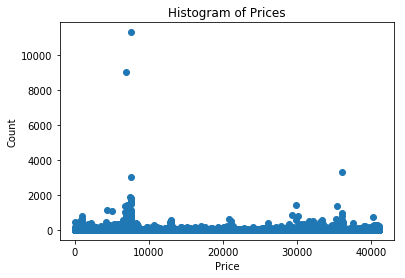

In [103]:
%matplotlib inline
# matplotlib histogram
plt.scatter(range(len(loose_p)),loose_p)

# Add labels
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
#maxfreq = n.max()
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
#plt.xlim(0,300)
plt.show()

In [105]:
#examine outliers
price_data_to_use.loc[price_data_to_use["loose-price"]>500]


,id,console-name,product-name,new-price,loose-price,sales-volume,genre,release-date,release-date-dt,release-year,product-name-slug
1189,33593,Atari 400,Softporn Adventure,2757.03,613.31,4,Action & Adventure,1/1/1981,1981-01-01,1981.0,softporn-adventure
1222,33500,Atari 400,Ultima I: The Original,3643.11,810.00,3,RPG,1/1/1980,1980-01-01,1980.0,ultima-i--the-original
5902,34078,GameBoy Color,Zelda Oracle of Ages & Seasons Limited Edition,3971.39,1134.88,3,Action & Adventure,5/21/2001,2001-05-21,2001.0,zelda-oracle-of-ages-&-seasons-limited-edition
6624,33018,Intellivision,Spiker! Super Pro Volleyball,1800.00,1055.22,6,Sports,1/1/1989,1989-01-01,1989.0,spiker!-super-pro-volleyball
9607,35787,Jaguar,BattleSphere,2628.14,584.01,9,Simulation,2/1/2000,2000-02-01,2000.0,battlesphere
9887,14927,NES,Cheetahmen II,2252.44,1024.38,5,Action & Adventure,1/1/1993,1993-01-01,1993.0,cheetahmen-ii
9977,34156,NES,Duck Tales Gold Cartridge,1415.15,1337.50,11,Action & Adventure,8/8/2013,2013-08-08,2013.0,duck-tales-gold-cartridge
9993,12224,NES,Family Fun Fitness Stadium Events,28553.74,9000.00,7,Sports,9/1/1987,1987-09-01,1987.0,family-fun-fitness-stadium-events
10010,13107,NES,Flintstones Surprise at Dinosaur Peak,6640.00,800.00,49,Action & Adventure,8/1/1994,1994-08-01,1994.0,flintstones-surprise-at-dinosaur-peak
10080,14931,NES,Hot Slots,3000.00,950.00,5,Action & Adventure,1/1/1991,1991-01-01,1991.0,hot-slots


In [92]:
#group by product-name-slug, to get the release-year of max(sales-volume), total sales-volume, and the weighted average of new-price
#modification 10/28, to add loose-price

#weighted mean
wm = lambda x: np.average(x, weights=price_data_to_use.loc[x.index, "new-price"])

#function to get the release year of max sales volume
#max_ry = lambda x:  price_data_to_use[price_data_to_use.loc[x.index,"sales-volume"].argmax(),"release-year"]
max_ry = lambda x:  price_data_to_use.loc[price_data_to_use.loc[x.index,"sales-volume"].idxmax(),"release-year"]
#max_ry = lambda x:  x.index

#a directory for the functions to apply
f = {"new-price":wm,"sales-volume":['sum'],"release-year":max_ry}

grouped_price_data = price_data_to_use.groupby(['product-name-slug']).agg(f)


In [93]:
len(grouped_price_data["release-year"].isnull() == True)

22923

In [94]:
grouped_price_data

,new-price,sales-volume,release-year
,<lambda>,sum,<lambda>
product-name-slug,,,
-30-great-games--family-party,7.880000,16,2008.0
007--agent-under-fire,12.430000,97,2002.0
007--everything-or-nothing,9.987067,143,2004.0
007--from-russia-with-love,8.940000,99,2005.0
007--nightfire,38.152903,255,2003.0
007--quantum-of-solace,8.594765,483,2008.0
007--world-is-not-enough,23.330000,360,2000.0
007-agent-under-fire,21.208075,1191,2002.0


##### Next step is to search the rawg database using the slug name to include features such as genres, developers, rating, platforms, release years, and description
##### To search, we first try searching accurately by slug and release year, if no match then try rough seach by slug and release year. If successful, we will obtain the first result, if not we will proceed by dumping that particular row

In [289]:
grouped_price_data_test = grouped_price_data

In [282]:
#a copy of the grouped price table for final result
grouped_price_data_test_end = grouped_price_data_test[:1000].copy()
#create columns to hold features
#"product-name-slug","new-price","sales-volume","release-year",
label_features = ["genres","name","slug","rating","developers","platforms","tags","match"]
#grouped_price_data_test_end = grouped_price_data_test_end.reindex(columns=label_features)


In [283]:
for title in label_features:
    grouped_price_data_test_end[title] = np.nan

In [284]:
grouped_price_data_test_end 

,new-price,sales-volume,release-year,genres,name,slug,rating,developers,platforms,tags,match
,<lambda>,sum,<lambda>,,,,,,,,
product-name-slug,,,,,,,,,,,
-30-great-games--family-party,7.880000,16,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007--agent-under-fire,12.430000,97,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007--everything-or-nothing,9.987067,143,2004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007--from-russia-with-love,8.940000,99,2005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007--nightfire,38.152903,255,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007--quantum-of-solace,8.594765,483,2008.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007--world-is-not-enough,23.330000,360,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007-agent-under-fire,21.208075,1191,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
def add_label(label_lst,rawg_item,index,df):
    for label in label_lst:
        v =  getattr(rawg_item,label)
        if (label == "platforms"):
            #need console names
            if len(v) == 1:
                df.at[index,label] = [p.name for p in v]
            elif len(v) >1:
                df.at[index,label] = ",".join(p.name for p in v)                    
        else:
            if isinstance(v,str):
                #line[label]=v
                df.at[index,label] = v
            elif isinstance(v,float):
                #line[label]=v
                df.at[index,label] = v
            #else if it's a list
            elif len(v) == 1:
                #print("inside label is: ",label)
                #line[label]=str(v)
                df.at[index,label] = str(v)
            elif len(v)>1:
                #print("inside type v is: ",type(v))
                #line[label] = ",".join(str(vv) for vv in v)
                df.at[index,label] = ",".join(str(vv) for vv in v)
    
    return df

In [286]:
count=0

In [287]:
for index,row in grouped_price_data_test_end.iterrows():
    print(count)
    count = count + 1
    game_slugname = index
    release_year = row["release-year"][0]
    match = False
    result_release_year = None
    #row_index = row.index
    #precise search first
    try:
        result_temp = rawg.get_game(game_slugname)
        result_temp.populate()
        #if a precise hit has been found then double check with the release year
        result_release_year = [plat_g.released_at for plat_g in result_temp.platforms]
        for yr in result_release_year:
            if len(yr)>4:
                temp_yr_num = float(yr[:4])
                if abs(temp_yr_num - release_year) < 2:
                    match = True
                    grouped_price_data_test_end = add_label(label_loop,result_temp,index,grouped_price_data_test_end)
                    grouped_price_data_test_end.at[index,"match"] = match
                    #early exit if matched exactly
                    break
            else:
                continue
        #if release year does not match, data remain NaN
        continue
    except:
        #if there's no exact match, do rough search
        result_temp = rawg.search(game_slugname)
        #take the first result suggested by the search (should be the closest among the 5)
        #continue if no match
        if len(result_temp) == 0:
            continue
        result_game = result_temp[0]
        result_game.populate()
        #if a game has been found then double check with the release year
        result_release_year = [plat_g.released_at for plat_g in result_game.platforms]
        for yr in result_release_year:
            if len(yr)>4:
                temp_yr_num = float(yr[:4])
                if abs(temp_yr_num - release_year) < 2:
                    match = True
                    #add the game details
                    grouped_price_data_test_end = add_label(label_loop,result_game,index,grouped_price_data_test_end)
                    grouped_price_data_test_end.at[index,"match"] = match
                    #early exit if matched
                    break
            else:
                continue
        #if release year does not match, data remain NaN
        continue
    else:
        #leave all the data as NaN
        grouped_price_data_test_end.at[index,"match"] = match
        continue 
    grouped_price_data_test_end.at[index,"match"] = match    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [288]:
grouped_price_data_test_end

,new-price,sales-volume,release-year,genres,name,slug,rating,developers,platforms,tags,match
,<lambda>,sum,<lambda>,,,,,,,,
product-name-slug,,,,,,,,,,,
-30-great-games--family-party,7.880000,16,2008.0,NaN,Family Party: 30 Great Games,family-party-30-great-games,0.00,NaN,Wii,[party],True
007--agent-under-fire,12.430000,97,2002.0,NaN,James Bond 007: Agent Under Fire,james-bond-007-agent-under-fire,3.90,"Electronic Arts,Visceral Games,Electronic Arts...","Xbox,GameCube,PlayStation 2","Multiplayer,Singleplayer",True
007--everything-or-nothing,9.987067,143,2004.0,[shooter],James Bond 007: Everything or Nothing,james-bond-007-everything-or-nothing,4.42,"Griptonite Games,Electronic Arts Redwood Shores","PlayStation 2,Game Boy Advance,Xbox,GameCube","Multiplayer,Singleplayer,cooperativeplay",True
007--from-russia-with-love,8.940000,99,2005.0,[action],James Bond 007: From Russia with Love,james-bond-007-from-russia-with-love,3.91,"Rebellion,Visceral Games,Electronic Arts Redwo...","GameCube,PlayStation 2,PSP,Xbox","Multiplayer,Singleplayer",True
007--nightfire,38.152903,255,2003.0,"Action,Shooter",James Bond 007: NightFire,james-bond-007-nightfire,3.93,[gearbox-software],PC,NaN,True
007--quantum-of-solace,8.594765,483,2008.0,[action],James Bond 007: Quantum of Solace,james-bond-007-quantum-of-solace,3.60,"Beenox,Vicarious Visions","PlayStation 3,PC,Xbox 360,Wii,Nintendo DS,Play...",NaN,True
007--world-is-not-enough,23.330000,360,2000.0,[action],007: The World is not Enough,the-world-is-not-enough,4.17,[eurocom],"PC,PlayStation,Nintendo 64","Multiplayer,Singleplayer,exclusive",True
007-agent-under-fire,21.208075,1191,2002.0,NaN,James Bond 007: Agent Under Fire,james-bond-007-agent-under-fire,3.90,"Electronic Arts,Visceral Games,Electronic Arts...","Xbox,GameCube,PlayStation 2","Multiplayer,Singleplayer",True


In [292]:
count = 0

In [293]:
grouped_price_data_copy = grouped_price_data.copy()
for title in label_features:
    grouped_price_data_copy[title] = np.nan

In [294]:
for index,row in grouped_price_data_copy.iterrows():
    #print(count)
    count = count + 1
    game_slugname = index
    release_year = row["release-year"][0]
    match = False
    result_release_year = None
    #row_index = row.index
    #precise search first
    try:
        result_temp = rawg.get_game(game_slugname)
        result_temp.populate()
        #if a precise hit has been found then double check with the release year
        result_release_year = [plat_g.released_at for plat_g in result_temp.platforms]
        for yr in result_release_year:
            if len(yr)>4:
                temp_yr_num = float(yr[:4])
                if abs(temp_yr_num - release_year) < 2:
                    match = True
                    grouped_price_data_copy = add_label(label_loop,result_temp,index,grouped_price_data_copy)
                    grouped_price_data_copy.at[index,"match"] = match
                    #early exit if matched exactly
                    break
            else:
                continue
        #if release year does not match, data remain NaN
        continue
    except:
        #if there's no exact match, do rough search
        result_temp = rawg.search(game_slugname)
        #take the first result suggested by the search (should be the closest among the 5)
        #continue if no match
        if len(result_temp) == 0:
            continue
        result_game = result_temp[0]
        result_game.populate()
        #if a game has been found then double check with the release year
        result_release_year = [plat_g.released_at for plat_g in result_game.platforms]
        for yr in result_release_year:
            if len(yr)>4:
                temp_yr_num = float(yr[:4])
                if abs(temp_yr_num - release_year) < 2:
                    match = True
                    #add the game details
                    grouped_price_data_copy = add_label(label_loop,result_game,index,grouped_price_data_copy)
                    grouped_price_data_copy.at[index,"match"] = match
                    #early exit if matched
                    break
            else:
                continue
        #if release year does not match, data remain NaN
        continue
    else:
        #leave all the data as NaN
        grouped_price_data_copy.at[index,"match"] = match
        continue 
    grouped_price_data_copy.at[index,"match"] = match 

In [295]:
grouped_price_data_copy

,new-price,sales-volume,release-year,genres,name,slug,rating,developers,platforms,tags,match
,<lambda>,sum,<lambda>,,,,,,,,
product-name-slug,,,,,,,,,,,
-30-great-games--family-party,7.880000,16,2008.0,NaN,Family Party: 30 Great Games,family-party-30-great-games,0.00,NaN,Wii,[party],True
007--agent-under-fire,12.430000,97,2002.0,NaN,James Bond 007: Agent Under Fire,james-bond-007-agent-under-fire,3.90,"Electronic Arts,Visceral Games,Electronic Arts...","Xbox,GameCube,PlayStation 2","Multiplayer,Singleplayer",True
007--everything-or-nothing,9.987067,143,2004.0,[shooter],James Bond 007: Everything or Nothing,james-bond-007-everything-or-nothing,4.42,"Griptonite Games,Electronic Arts Redwood Shores","PlayStation 2,Game Boy Advance,Xbox,GameCube","Multiplayer,Singleplayer,cooperativeplay",True
007--from-russia-with-love,8.940000,99,2005.0,[action],James Bond 007: From Russia with Love,james-bond-007-from-russia-with-love,3.91,"Rebellion,Visceral Games,Electronic Arts Redwo...","GameCube,PlayStation 2,PSP,Xbox","Multiplayer,Singleplayer",True
007--nightfire,38.152903,255,2003.0,"Action,Shooter",James Bond 007: NightFire,james-bond-007-nightfire,3.93,[gearbox-software],PC,NaN,True
007--quantum-of-solace,8.594765,483,2008.0,[action],James Bond 007: Quantum of Solace,james-bond-007-quantum-of-solace,3.60,"Beenox,Vicarious Visions","PlayStation 3,PC,Xbox 360,Wii,Nintendo DS,Play...",NaN,True
007--world-is-not-enough,23.330000,360,2000.0,[action],007: The World is not Enough,the-world-is-not-enough,4.17,[eurocom],"PC,PlayStation,Nintendo 64","Multiplayer,Singleplayer,exclusive",True
007-agent-under-fire,21.208075,1191,2002.0,NaN,James Bond 007: Agent Under Fire,james-bond-007-agent-under-fire,3.90,"Electronic Arts,Visceral Games,Electronic Arts...","Xbox,GameCube,PlayStation 2","Multiplayer,Singleplayer",True


In [298]:
#export the merged database to csv
grouped_price_data_copy.to_csv("GameData.csv", sep='\t')

In [300]:
#export the raw data for backup

#original data
price_data.to_csv("RawPriceData.csv", sep='\t')

#data without nan new price and dats
price_data_to_use.to_csv("CleanedPriceData.csv", sep='\t')

In [316]:
#toinclude description (hold 10/16/2019)
label_features_desp = ["genres","name","slug","rating","developers","platforms","tags","description","match"]
grouped_price_data_copy_desp = grouped_price_data.copy()
for title in label_features_desp:
    grouped_price_data_copy_desp[title] = np.nan

In [317]:
#grouped_price_data_copy_desp = grouped_price_data_copy_desp[:50]

In [318]:
label_loop2 = label_features_desp[:-1]

In [319]:
for index,row in grouped_price_data_copy_desp.iterrows():
    #print(count)
    count = count + 1
    game_slugname = index
    release_year = row["release-year"][0]
    match = False
    result_release_year = None
    #row_index = row.index
    #precise search first
    try:
        result_temp = rawg.get_game(game_slugname)
        result_temp.populate()
        #if a precise hit has been found then double check with the release year
        result_release_year = [plat_g.released_at for plat_g in result_temp.platforms]
        for yr in result_release_year:
            if len(yr)>4:
                temp_yr_num = float(yr[:4])
                if abs(temp_yr_num - release_year) < 2:
                    match = True
                    grouped_price_data_copy_desp = add_label(label_loop2,result_temp,index,grouped_price_data_copy_desp)
                    grouped_price_data_copy_desp.at[index,"match"] = match
                    #early exit if matched exactly
                    break
            else:
                continue
        #if release year does not match, data remain NaN
        continue
    except:
        #if there's no exact match, do rough search
        result_temp = rawg.search(game_slugname)
        #take the first result suggested by the search (should be the closest among the 5)
        #continue if no match
        if len(result_temp) == 0:
            continue
        result_game = result_temp[0]
        result_game.populate()
        #if a game has been found then double check with the release year
        result_release_year = [plat_g.released_at for plat_g in result_game.platforms]
        for yr in result_release_year:
            if len(yr)>4:
                temp_yr_num = float(yr[:4])
                if abs(temp_yr_num - release_year) < 2:
                    match = True
                    #add the game details
                    grouped_price_data_copy_desp = add_label(label_loop2,result_game,index,grouped_price_data_copy_desp)
                    grouped_price_data_copy_desp.at[index,"match"] = match
                    #early exit if matched
                    break
            else:
                continue
        #if release year does not match, data remain NaN
        continue
    else:
        #leave all the data as NaN
        grouped_price_data_copy_desp.at[index,"match"] = match
        continue 
    grouped_price_data_copy_desp.at[index,"match"] = match 

ConnectionError: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))

In [322]:
grouped_price_data_copy_desp

,new-price,sales-volume,release-year,genres,name,slug,rating,developers,platforms,tags,description,match
,<lambda>,sum,<lambda>,,,,,,,,,
product-name-slug,,,,,,,,,,,,
-30-great-games--family-party,7.880000,16,2008.0,NaN,Family Party: 30 Great Games,family-party-30-great-games,0.00,NaN,Wii,[party],"<p style=""margin-top: 0"">\n Optimized for...",True
007--agent-under-fire,12.430000,97,2002.0,NaN,James Bond 007: Agent Under Fire,james-bond-007-agent-under-fire,3.90,"Electronic Arts,Visceral Games,Electronic Arts...","Xbox,GameCube,PlayStation 2","Multiplayer,Singleplayer",<p>James Bond 007: Agent Under Fire is a first...,True
007--everything-or-nothing,9.987067,143,2004.0,[shooter],James Bond 007: Everything or Nothing,james-bond-007-everything-or-nothing,4.42,"Griptonite Games,Electronic Arts Redwood Shores","PlayStation 2,Game Boy Advance,Xbox,GameCube","Multiplayer,Singleplayer,cooperativeplay",<p>James Bond 007: Everything or Nothing is a ...,True
007--from-russia-with-love,8.940000,99,2005.0,[action],James Bond 007: From Russia with Love,james-bond-007-from-russia-with-love,3.91,"Rebellion,Visceral Games,Electronic Arts Redwo...","GameCube,PlayStation 2,PSP,Xbox","Multiplayer,Singleplayer",<p>James Bond 007: From Russia with Love is a ...,True
007--nightfire,38.152903,255,2003.0,"Action,Shooter",James Bond 007: NightFire,james-bond-007-nightfire,3.93,[gearbox-software],PC,NaN,,True
007--quantum-of-solace,8.594765,483,2008.0,[action],James Bond 007: Quantum of Solace,james-bond-007-quantum-of-solace,3.60,"Beenox,Vicarious Visions","PlayStation 3,PC,Xbox 360,Wii,Nintendo DS,Play...",NaN,<p>James Bond is back to settle the score in t...,True
007--world-is-not-enough,23.330000,360,2000.0,[action],007: The World is not Enough,the-world-is-not-enough,4.17,[eurocom],"PC,PlayStation,Nintendo 64","Multiplayer,Singleplayer,exclusive",<p>The World Is Not Enough is a first-person s...,True
007-agent-under-fire,21.208075,1191,2002.0,NaN,James Bond 007: Agent Under Fire,james-bond-007-agent-under-fire,3.90,"Electronic Arts,Visceral Games,Electronic Arts...","Xbox,GameCube,PlayStation 2","Multiplayer,Singleplayer",<p>James Bond 007: Agent Under Fire is a first...,True
